# Chapter 1

Text(0.5, 0.98, 'Problem 3')

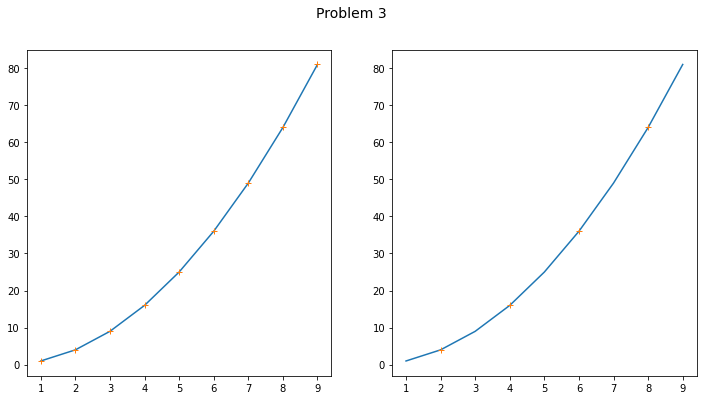

In [1]:
# Problem 3
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(1.,10.)
y = x**2

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(x, y, '-', x,y, '+')
plt.subplot(122)
plt.plot(x, y, '-', x[1:10:2], y[1:10:2], '+')
plt.suptitle("Problem 3", fontsize=14)

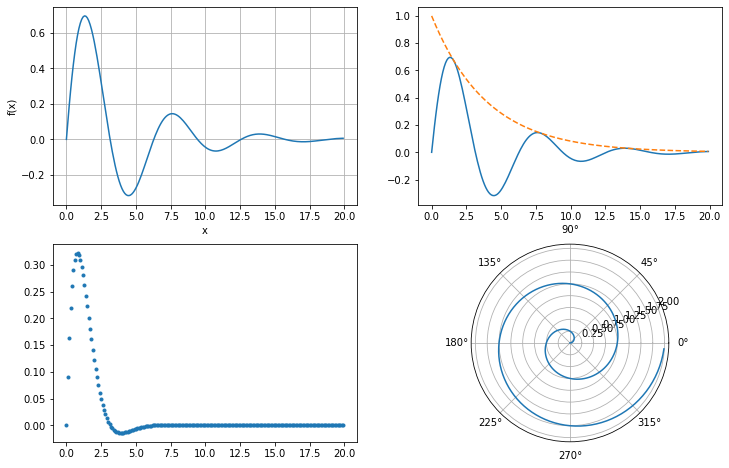

In [2]:
# Problem 4

x = np.arange(0.,20., 0.1)
y11 = np.exp(-x/4)* np.sin(x)
y12 = np.exp(-x/4)
y21 = np.exp(-x)*np.sin(x)

rho = np.arange(0, 2, 0.01)
theta = 2 * np.pi * rho


plt.figure(figsize=(12,8))
plt.subplot(221)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.plot(x, y11)
plt.subplot(222)
plt.plot(x, y11, '-', x, y12,'--')
plt.subplot(223)
plt.plot(x, y21, '.')
plt.subplot(224, projection='polar')
plt.polar(theta, rho)

In [3]:
#Chapter 2
#* Set initial position and velocity of the baseball
y0 = 10
r0 = np.array([0, y0])      # Initial vector position
speed = 10
theta = 30
v0 = np.array([speed * np.cos(theta*np.pi/180), 
      speed * np.sin(theta*np.pi/180)])      # Initial velocity
r = np.copy(r0)   # Set initial position 
v = np.copy(v0)   # Set initial velocity

#* Set physical parameters (mass, Cd, etc.)
Cd = 0.35      # Drag coefficient (dimensionless)
area = 4.3e-3  # Cross-sectional area of projectile (m^2)
grav = 9.81    # Gravitational acceleration (m/s^2)
mass = 0.145   # Mass of projectile (kg)
airFlag = 0
if airFlag == 0 :
    rho = 0.      # No air resistance
else:
    rho = 1.2     # Density of air (kg/m^3)
air_const = -0.5*Cd*rho*area/mass   # Air resistance constant

In [4]:
#* Loop until ball hits ground or max steps completed
tau = 1
maxstep = 1000    # Maximum number of steps
xplot = np.empty(maxstep);  yplot = np.empty(maxstep)
xNoAir = np.empty(maxstep); yNoAir = np.empty(maxstep)
for istep in range(maxstep):

    #* Record position (computed and theoretical) for plotting
    xplot[istep] = r[0]   # Record trajectory for plot
    yplot[istep] = r[1]
    t = istep*tau         # Current time
    xNoAir[istep] = r0[0] + v0[0]*t
    yNoAir[istep] = r0[1] + v0[1]*t - 0.5*grav*t**2
  
    #* Calculate the acceleration of the ball 
    accel = air_const * np.linalg.norm(v) * v   # Air resistance
    accel[1] = accel[1] - grav                  # Gravity
  
    #* Calculate the new position and velocity using Euler method
    r = r + tau*v                    # Euler step
    v = v + tau*accel     
  
    #* If ball reaches ground (y<0), break out of the loop
    if r[1] < 0 : 
        laststep = istep+1
        xplot[laststep] = r[0]  # Record last values computed
        yplot[laststep] = r[1]
        break                   # Break out of the for loop

In [5]:
print(f'Maximum range is {r[0]} meters')
print(f'Time of flight is {laststep*tau} seconds')

Maximum range is 25.98076211353316 meters
Time of flight is 3 seconds


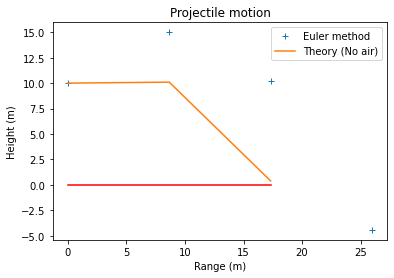

In [6]:

#* Graph the trajectory of the baseball
# Mark the location of the ground by a straight line
xground = np.array([0., xNoAir[laststep-1]])
yground = np.array([0., 0.])
# Plot the computed trajectory and parabolic, no-air curve
plt.plot(xplot[0:laststep+1], yplot[0:laststep+1], '+',
         xNoAir[0:laststep], yNoAir[0:laststep], '-',
         xground,yground,'r-')
plt.legend(['Euler method', 'Theory (No air)']);
plt.xlabel('Range (m)')
plt.ylabel('Height (m)')
plt.title('Projectile motion')
plt.show()